# 水彩画效果

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/f2.jpg')
gray = cv2.imread('../datas/f2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [7]:
def watercolor(src):
    dst = np.zeros_like(src).astype(np.float32)
    srcf = src.astype(np.float32)
    rows,cols = srcf.shape[0],srcf.shape[1]
    pos = np.array([
        (-1,-1),(0,-1),(1,-1),
        (-1,0),(0,0),(1,0),
        (-1,1),(0,1),(1,1)
    ],dtype=np.int32)
    kernel = np.array([
        [1./16., 1./8.,1./16.],  
        [1./8.,1./4.,1./8.],  
        [1./16.,1./8.,1./16.]
    ])
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            final_color_r = 0.
            final_color_g = 0.
            final_color_b = 0.
            for m in range(3):
                for n in range(3):
                    ny = (i + pos[m*n][1])
                    nx = (j + pos[m*n][0])
                    final_color_r += srcf[ny,nx,0] * kernel[m,n]
                    final_color_g += srcf[ny,nx,1] * kernel[m,n]
                    final_color_b += srcf[ny,nx,2] * kernel[m,n]
            dst[i,j] = (final_color_r,final_color_g,final_color_b)
            
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

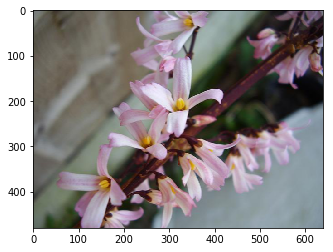

In [8]:
dst = watercolor(rgb)
plt.imshow(dst)